# 数据获取

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = '..\\data\\input\\NASA\\2nd_test\\2nd_test'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
#     print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1, 4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17272\2211146796.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(dataset_mean_abs)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17272\2211146796.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(dataset_mean_abs)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17272\2211146796.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(dataset_mean_abs)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17272\2211146796.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.appen

In [3]:
merged_data

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004.02.12.10.32.39,0.058333,0.071832,0.083242,0.043067
2004.02.12.10.42.39,0.058995,0.074006,0.084435,0.044541
2004.02.12.10.52.39,0.060236,0.074227,0.083926,0.044443
2004.02.12.11.02.39,0.061455,0.073844,0.084457,0.045081
2004.02.12.11.12.39,0.061361,0.075609,0.082837,0.045118
...,...,...,...,...
2004.02.19.05.42.39,0.453335,0.161016,0.137440,0.119047
2004.02.19.05.52.39,0.337583,0.132400,0.144992,0.092125
2004.02.19.06.02.39,0.351111,0.152266,0.151299,0.100817
2004.02.19.06.12.39,0.001857,0.003732,0.003656,0.001786


In [4]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


In [5]:
merged_data = merged_data.sort_index()
merged_data.to_csv('..\\data\\output\\2nd_test_data.csv')
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


# 数据集划分

In [6]:
data_train = merged_data['2004-02-12 10:32:39' : '2004-02-13 23:52:39']
data_test = merged_data['2004-02-13 23:52:39' :]

<AxesSubplot:>

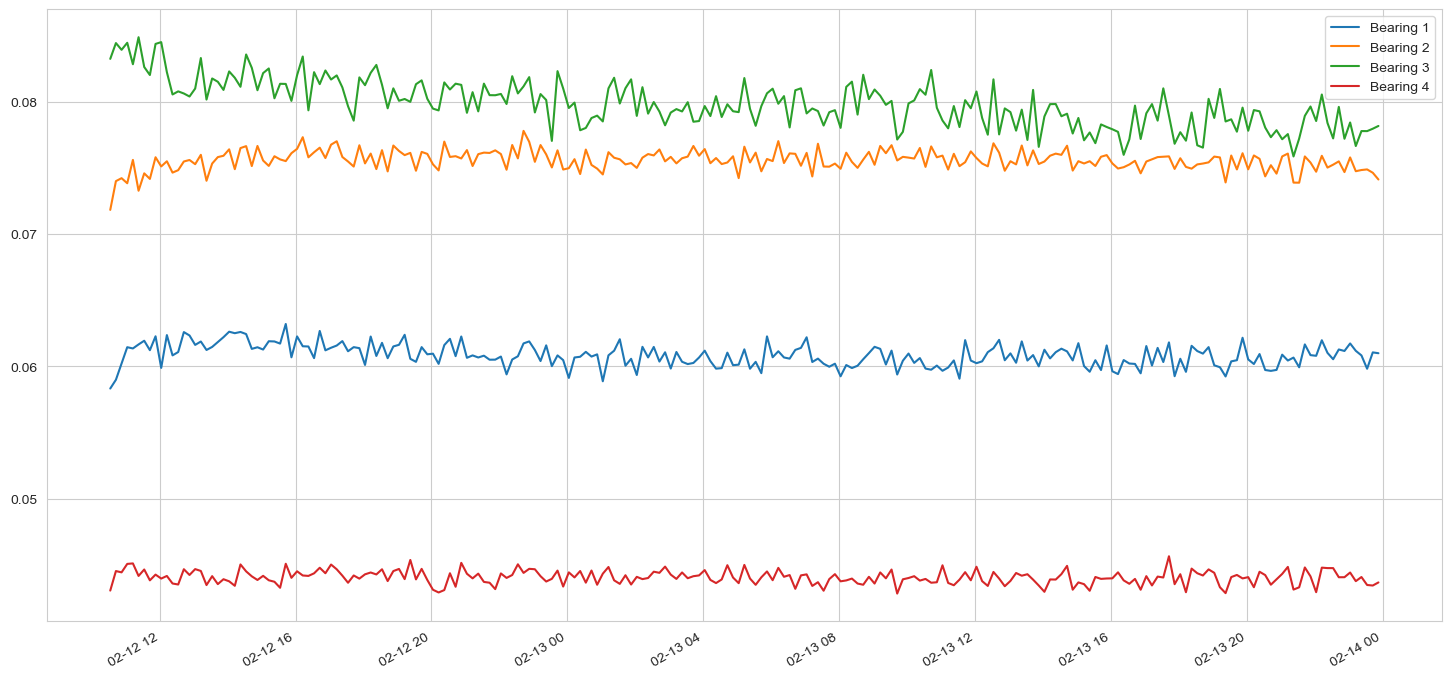

In [7]:
data_train.plot(figsize=(18, 9))

<AxesSubplot:>

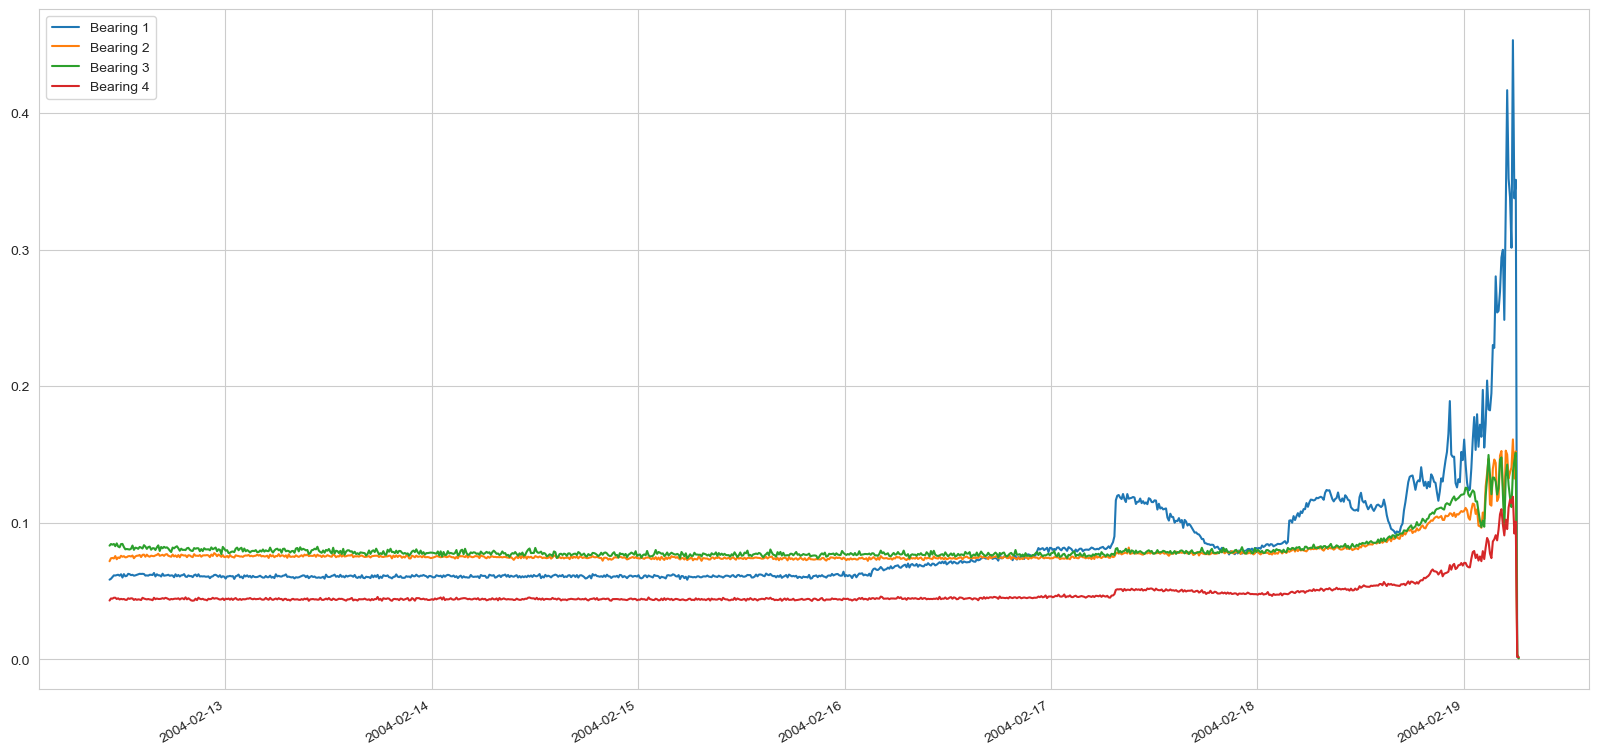

In [8]:
merged_data.plot(figsize=(20, 10))

# 特征工程

In [9]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(data_train),
                       columns=data_train.columns,
                       index=data_train.index)

X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.fit_transform(data_test),
                       columns=data_test.columns,
                       index=data_test.index)

In [10]:
from sklearn.decomposition import PCA

In [11]:
# PCA降维
pca = PCA(n_components=2, svd_solver='full')

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [12]:
X_test_PCA

,0,1
2004-02-13 23:52:39,0.246377,0.169983
2004-02-14 00:02:39,0.245566,0.167434
2004-02-14 00:12:39,0.248185,0.169166
2004-02-14 00:22:39,0.244196,0.161696
2004-02-14 00:32:39,0.245812,0.162840
...,...,...
2004-02-19 05:42:39,-0.936678,-0.140249
2004-02-19 05:52:39,-0.661904,0.102635
2004-02-19 06:02:39,-0.774237,0.059607
2004-02-19 06:12:39,0.916964,0.131462


In [13]:
def is_pos_def(matrix):
    if np.allclose(matrix, matrix.T):
        try:
            np.linalg.cholesky(matrix)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False
    pass

def cov_matrix(data, verbose):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print('Error: Inverse of Covariance Matrix is not positive definite!')
    else:
        print("Error: Covariance Matrix is not positive definite!")
    pass

def MahalanobisDistance(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    m_distance = []
    for i in range(len(diff)):
        m_distance.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
        pass
    return m_distance
    pass

def MD_detectOutlier(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []

    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)
            pass
        pass
    return np.array(outliers)
    pass

def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold
    pass


In [14]:
train_data = np.array(X_train_PCA.values)
test_data = np.array(X_test_PCA.values)

In [15]:
train_data

array([[ 0.39846042,  0.67028145],
       [-0.1253512 ,  0.3491669 ],
       [-0.21877222,  0.29863489],
       [-0.49260563,  0.18365239],
       [-0.45600552, -0.01003959],
       [-0.34815493,  0.43961892],
       [-0.37595124,  0.09818495],
       [-0.08455734,  0.26352229],
       [-0.5086868 ,  0.28438931],
       [-0.16886399,  0.43243227],
       [-0.34385048,  0.14129199],
       [ 0.08182225,  0.19126315],
       [ 0.04490624,  0.21729507],
       [-0.35620262, -0.1104789 ],
       [-0.23556106, -0.02815173],
       [-0.26762452, -0.05657493],
       [-0.45376959,  0.13615829],
       [ 0.11141998,  0.19822105],
       [-0.20338644,  0.1289652 ],
       [-0.13421814,  0.22386685],
       [-0.20791738,  0.07837431],
       [-0.33761669,  0.20539661],
       [-0.1652922 ,  0.29256851],
       [-0.5026087 , -0.18370082],
       [-0.55586797,  0.13367322],
       [-0.23031155,  0.20631097],
       [-0.14341406,  0.08156426],
       [-0.22292195,  0.1532095 ],
       [-0.23478743,

In [19]:
covariance_martrix, in_cov_matrix = cov_matrix(train_data, False)
mean_distr = train_data.mean(axis=0)

In [20]:
dist_train = MahalanobisDistance(inv_cov_matrix=in_cov_matrix, mean_distr=mean_distr, data=train_data, verbose=False)
dist_test = MahalanobisDistance(inv_cov_matrix=in_cov_matrix, mean_distr=mean_distr, data=test_data, verbose=False)
threshold = MD_threshold(dist_train, extreme=True)

In [21]:
threshold

3.790139558803949

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 15.0)

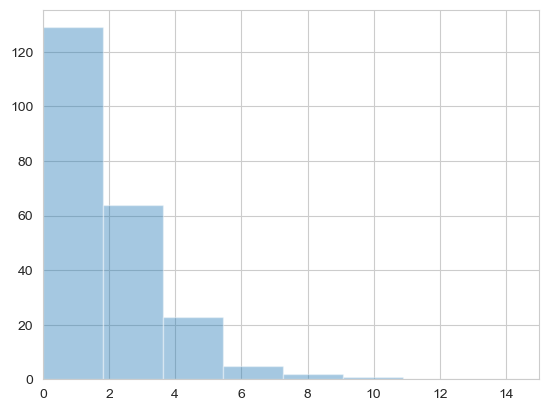

In [22]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins=10,
             kde=False)
plt.xlim([0.0, 15])

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'MahalanobisDistance')

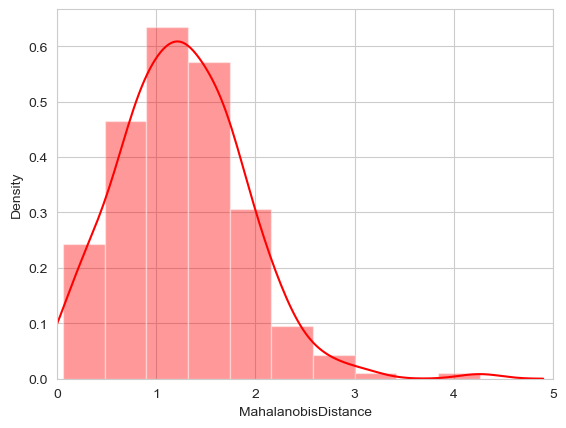

In [25]:
plt.figure()
sns.distplot(dist_train,
             bins=10,
             kde=True,
             color='red')
plt.xlim([0.0, 5])
plt.xlabel('MahalanobisDistance')

In [26]:
import math

threshold_floor = math.floor(threshold)
threshold_floor

3

# 异常数据处理

In [27]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist'] = dist_train
anomaly_train['Thresh'] = threshold_floor
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

In [29]:
anomaly = pd.DataFrame()
anomaly['Mob dist'] = dist_test
anomaly['Thresh'] = threshold_floor
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
2004-02-13 23:52:39,1.414950,3,False
2004-02-14 00:02:39,1.402055,3,False
2004-02-14 00:12:39,1.416784,3,False
2004-02-14 00:22:39,1.374544,3,False
2004-02-14 00:32:39,1.383944,3,False


In [30]:
anomaly[anomaly['Mob dist'] > 3]

,Mob dist,Thresh,Anomaly
2004-02-19 05:02:39,3.213351,3,True
2004-02-19 05:42:39,3.896178,3,True
2004-02-19 06:02:39,3.166989,3,True
2004-02-19 06:12:39,3.807065,3,True
2004-02-19 06:22:39,3.865970,3,True


In [31]:
anomaly_data = pd.concat([anomaly_train, anomaly])
anomaly_data.to_csv('..\\data\\output\\Anomaly_distance.csv')

# 门限值验证

<AxesSubplot:>

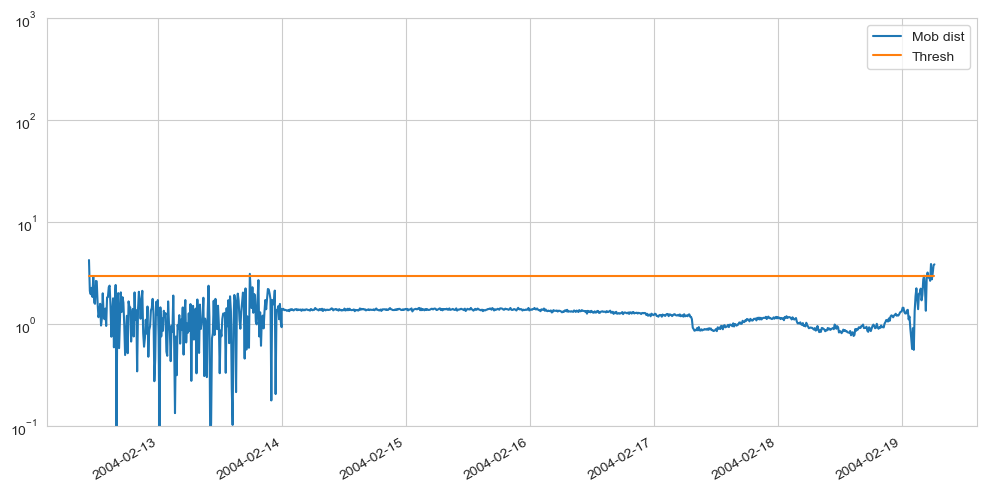

In [32]:
anomaly_data.plot(logy=True,
                  figsize=(12, 6),
                  ylim=[1e-1, 1e3],
                  )